In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fe_speciation_calc import fe_speciation, monte_carlo_iter
sns.set_style("whitegrid")

df = pd.read_excel('Iron_speciation_calculator_input.xlsx')
df

,sample_index,temperature,pressure,log_fO2,SiO2,TiO2,Al2O3,FeO,MnO,MgO,...,Al2O3_std,FeO_std,MnO_std,MgO_std,CaO_std,Na2O_std,K2O_std,P2O5_std,NiO_std,Cr2O3_std
0,02As1,1593.15,100000,-7.09,46.66,2.43,10.16,13.06,0.19,13.15,...,0.10,0.22,0.34,0.10,0.26,0.20,0.04,0.04,NaN,0.04
1,01As1,1575.15,100000,-7.28,46.96,2.53,10.34,13.21,0.20,12.16,...,0.07,0.20,0.21,0.10,0.12,0.14,0.05,0.03,NaN,0.08
2,12As1,1593.15,100000,-5.09,46.36,2.40,10.07,12.34,0.20,13.87,...,0.07,0.22,0.35,0.09,0.26,0.21,0.06,0.04,NaN,0.04
3,07As1,1575.15,100000,-5.28,46.83,2.53,10.39,12.72,0.20,12.61,...,0.10,0.13,0.30,0.10,0.22,0.14,0.05,0.05,NaN,0.03


#### Generate monte carlo dataframe

In [2]:
#Change number to reflect how many new liquid compositions you wish to generate for that sample
mc_df = monte_carlo_iter(df, 3000)
mc_df.head()

,index,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,P2O5,NiO,Cr2O3,sample_index,temperature,pressure,log_fO2
0,0.0,46.776554,2.311630,9.983463,12.798705,0.306303,13.103968,11.767180,1.944459,0.470613,0.182961,0.0,0.132840,02As1,1593.15,100000,-7.09
1,0.0,46.963733,2.853486,9.992154,13.205835,0.117409,13.093213,11.324278,1.958405,0.488312,0.161205,0.0,0.107980,02As1,1593.15,100000,-7.09
2,0.0,47.116082,2.596195,9.887949,13.279785,0.000000,13.204529,11.871943,2.286349,0.523643,0.143450,0.0,0.065669,02As1,1593.15,100000,-7.09
3,0.0,46.993953,2.401106,10.071536,13.265164,0.000000,13.222071,11.426936,1.852464,0.471737,0.161261,0.0,0.135497,02As1,1593.15,100000,-7.09
4,0.0,46.610694,2.776413,10.040323,12.536768,0.206463,13.375191,11.668599,2.143191,0.504725,0.219115,0.0,0.198596,02As1,1593.15,100000,-7.09


#### Input montecarlo dataframe into fe_partition function

##### Run single model

In [3]:
Putirka_2016 = fe_speciation(mc_df, mc_df['sample_index'], mc_df['temperature'], mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model='Putirka_2016')

##### Run all models

In [4]:
models = ["IrvineBarager_1971",
            "LeMaitre_1976",
            "Sack_1980",
            "Kress_1991",
            "Kress_1991_lowp",
            "Jayasuriya_2004",
            "Putirka_2016",
            "ONeill_2018",
            "Borisov_2018"]

df_all_models = pd.DataFrame()

for model in models:
    df_fe = fe_speciation(mc_df, mc_df['sample_index'], mc_df['temperature'], mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model=model)
    df_fe['model'] = model
    df_all_models = pd.concat([df_all_models, df_fe])

##### Run a chosen selection of models

In [5]:
models_selection = ["Sack_1980",
                    "Kress_1991",
                    "Kress_1991_lowp",
                    "Jayasuriya_2004",
                    "Putirka_2016",
                    "ONeill_2018",
                    "Borisov_2018"]

df_models_selection = pd.DataFrame()

for model in models_selection:
    df_fe = fe_speciation(mc_df, mc_df['sample_index'], mc_df['temperature'], mc_df['pressure'], fO2 = 10 ** mc_df['log_fO2'], model=model)
    df_fe['model'] = model
    df_models_selection = pd.concat([df_models_selection, df_fe])

df_models_selection.join(mc_df['temperature'])


,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,K2O,...,NiO,total,Fe3Fetot,XFe2O3_XFeO,sample_index,model,Fe2O3_FeO,Fe3_Fe2,XFeO15_XFeO,temperature
0,46.803910,2.312999,9.989226,11.343629,1.625433,0.306483,13.111697,11.774121,1.945605,0.470911,...,0.0,100.0,0.114207,0.064466,02As1,Sack_1980,NaN,NaN,NaN,1593.15
0,46.782075,2.311920,9.984566,10.919431,2.090233,0.306340,13.105580,11.768628,1.944697,0.470691,...,0.0,100.0,0.146933,0.086121,02As1,Kress_1991,NaN,NaN,NaN,1593.15
0,46.782412,2.311937,9.984638,10.925984,2.083052,0.306342,13.105675,11.768713,1.944711,0.470694,...,0.0,100.0,0.146428,0.085773,02As1,Kress_1991_lowp,NaN,NaN,NaN,1593.15
0,46.765016,2.311077,9.980925,10.588012,2.453373,0.306228,13.100801,11.764336,1.943988,0.470519,...,0.0,100.0,0.172523,0.104247,02As1,Jayasuriya_2004,NaN,NaN,NaN,1593.15
0,46.780460,2.311840,9.984221,10.888053,2.124614,0.306329,13.105128,11.768222,1.944630,0.470675,...,0.0,100.0,0.149355,0.087790,02As1,Putirka_2016,NaN,NaN,NaN,1593.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11999,46.330444,2.977784,10.232356,9.116026,4.258277,0.000000,12.624240,11.545222,2.082593,0.488780,...,0.0,100.0,0.295929,0.210156,07As1,Kress_1991_lowp,NaN,NaN,NaN,1575.15
11999,46.300223,2.975842,10.225682,8.524360,4.906448,0.000000,12.616006,11.537691,2.081234,0.488461,...,0.0,100.0,0.341196,0.258951,07As1,Jayasuriya_2004,NaN,NaN,NaN,1575.15
11999,46.330614,2.977795,10.232394,9.119355,4.254630,0.000000,12.624287,11.545265,2.082600,0.488781,...,0.0,100.0,0.295674,0.209899,07As1,Putirka_2016,NaN,NaN,NaN,1575.15
11999,46.371755,2.980417,10.241557,9.723395,3.573766,0.000000,12.635434,11.555459,2.084441,0.489192,...,0.0,100.0,0.248523,NaN,07As1,ONeill_2018,0.367543,0.330713,NaN,1575.15


### Plot output data

##### Single model

Text(0.5, 0.98, '02As1')

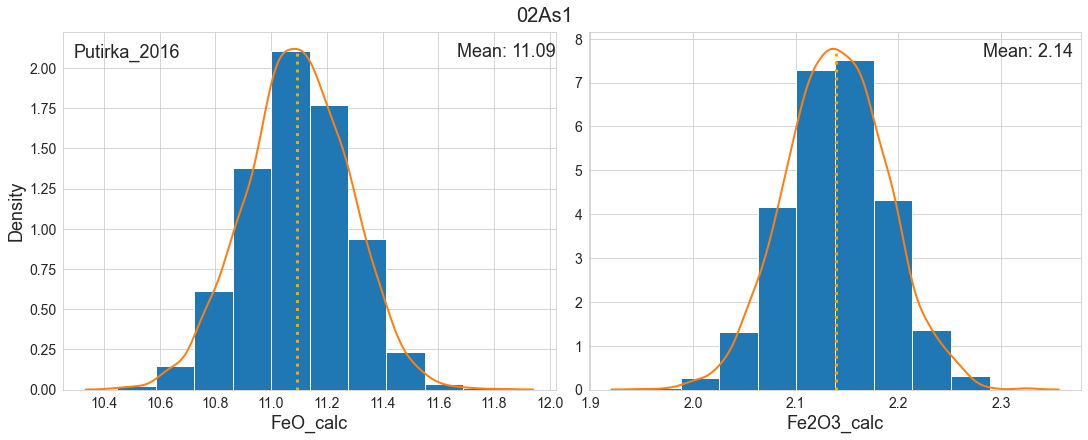

In [6]:
sample_feo = Putirka_2016[Putirka_2016['sample_index'] == '02As1']['FeO_calc']
sample_fe2o3 = Putirka_2016[Putirka_2016['sample_index'] == '02As1']['Fe2O3_calc']

fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True, sharex='col')

#Plot histogram
ax[0].hist(sample_feo, density=True)
ax[1].hist(sample_fe2o3, density=True)

#Plot KDE
sns.kdeplot(sample_feo, linewidth=2, ax=ax[0])
sns.kdeplot(sample_fe2o3, linewidth=2, ax=ax[1])

#Calculate means and plot as line
sample_feo_mean = sample_feo.mean()
kdeline_feo = ax[0].lines[0]
xs = kdeline_feo.get_xdata()
ys = kdeline_feo.get_ydata()
height_feo = np.interp(sample_feo_mean, xs, ys)
ax[0].vlines(sample_feo_mean, 0, height_feo, 'orange', linewidth=3, ls=':')

sample_fe2o3_mean = sample_fe2o3.mean()
kdeline_fe2o3 = ax[1].lines[0]
xs = kdeline_fe2o3.get_xdata()
ys = kdeline_fe2o3.get_ydata()
height_feo = np.interp(sample_fe2o3_mean, xs, ys)
ax[1].vlines(sample_fe2o3_mean, 0, height_feo, 'orange', linewidth=3, ls=':')


ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

ax[0].annotate("Putirka_2016", xy=(0.02, 0.93), xycoords="axes fraction", fontsize=18)
ax[0].annotate('Mean: {}'.format(round(sample_feo_mean,2)), xy=(0.8, 0.93), xycoords="axes fraction", fontsize=18)
ax[1].annotate('Mean: {}'.format(round(sample_fe2o3_mean,2)), xy=(0.8, 0.93), xycoords="axes fraction", fontsize=18)

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('02As1', fontsize=20)

##### All models

Text(0.5, 0.98, '02As1')

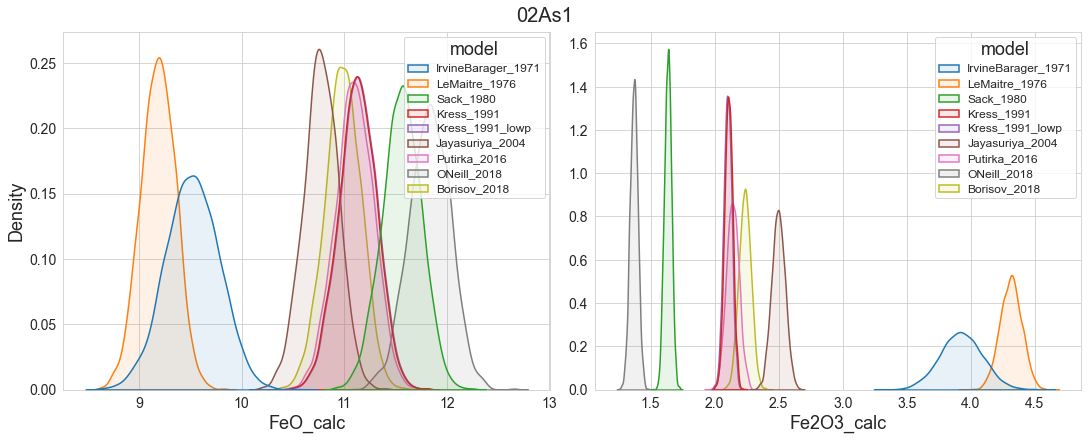

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True)

sns.set_style("whitegrid")
feo_plt = sns.kdeplot(data=df_all_models[df_all_models['sample_index'] == '02As1'].reset_index(), x="FeO_calc", hue="model",  linewidth=1.5, alpha=0.1, fill=True, ax=ax[0])
fe2o3_plt = sns.kdeplot(data=df_all_models[df_all_models['sample_index'] == '02As1'].reset_index(), x="Fe2O3_calc", hue="model", linewidth=1.5, alpha=0.1, fill=True, ax=ax[1])

ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

plt.setp(feo_plt.get_legend().get_texts(), fontsize='12')
plt.setp(feo_plt.get_legend().get_title(), fontsize='18') 
plt.setp(fe2o3_plt.get_legend().get_texts(), fontsize='12')
plt.setp(fe2o3_plt.get_legend().get_title(), fontsize='18') 

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('02As1', fontsize=20)

##### Subset of models

Text(0.5, 0.98, '02As1')

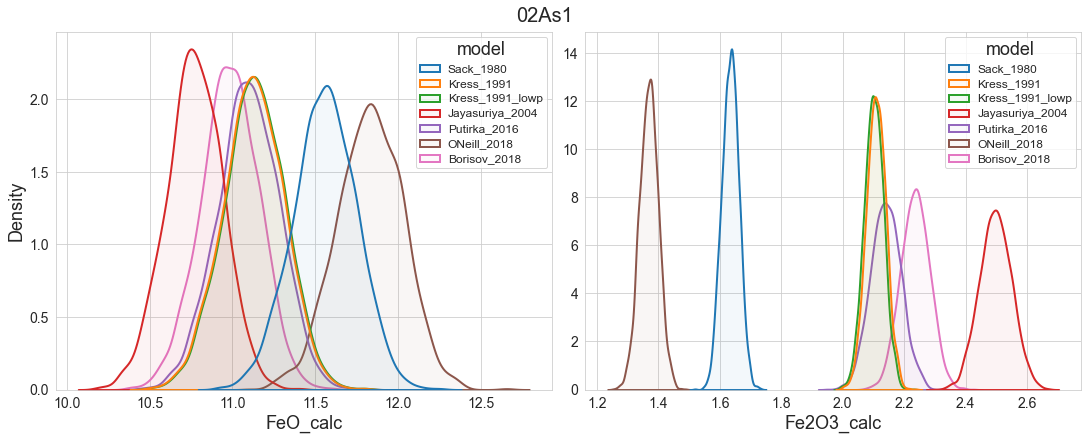

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,6), constrained_layout = True)

sns.set_style("whitegrid")
feo_plt = sns.kdeplot(data=df_models_selection[df_models_selection['sample_index'] == '02As1'].reset_index(), x="FeO_calc", common_norm=False, hue="model",  linewidth=2, alpha=0.05, fill=True, ax=ax[0])
fe2o3_plt = sns.kdeplot(data=df_models_selection[df_models_selection['sample_index'] == '02As1'].reset_index(), x="Fe2O3_calc", common_norm=False, hue="model", linewidth=2, alpha=0.05, fill=True, ax=ax[1])

ax[0].set_xlabel('FeO_calc', fontsize=18)
ax[1].set_xlabel('Fe2O3_calc', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
ax[1].set_ylabel('', fontsize=18)

plt.setp(feo_plt.get_legend().get_texts(), fontsize='12')
plt.setp(feo_plt.get_legend().get_title(), fontsize='18') 
plt.setp(fe2o3_plt.get_legend().get_texts(), fontsize='12')
plt.setp(fe2o3_plt.get_legend().get_title(), fontsize='18') 

for axi in ax.flat:
    axi.tick_params(labelsize=14)

plt.suptitle('02As1', fontsize=20)

### Generate data tables

##### Single model

In [9]:
#One sample at a time
np.mean(Putirka_2016[Putirka_2016['sample_index'] == '02As1']['FeO_calc'])

11.094470936715581

In [10]:
#Table for all samples
#sort = False will preserve order of samples in input sheet, True will sort alphabetically
Putirka_2016.groupby('sample_index', sort=False)[['Fe3Fetot','FeO_calc', 'Fe2O3_calc' ]].agg(['median', 'mean', 'std']) 

Fe3Fetot                       FeO_calc                       \
                median      mean       std     median       mean       std   
sample_index                                                                 
02As1         0.147921  0.147877  0.003082  11.095558  11.094471  0.186052   
01As1         0.146331  0.146362  0.002194  11.269858  11.271166  0.169725   
12As1         0.292083  0.292089  0.005283   8.734719   8.737967  0.173288   
07As1         0.293892  0.293948  0.003814   8.957280   8.958348  0.112476   

             Fe2O3_calc                      
                 median      mean       std  
sample_index                                 
02As1          2.139453  2.139567  0.049302  
01As1          2.147208  2.147650  0.041067  
12As1          4.005038  4.006464  0.086848  
07As1          4.142656  4.144787  0.061658

##### All models

In [11]:
df_stats = pd.DataFrame()

for model in models:
    df_iter = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False)[['Fe3Fetot','FeO_calc', 'Fe2O3_calc' ]].agg(['median', 'mean', 'std'])
    df_iter['model'] = model
    df_stats = pd.concat([df_stats, df_iter])
    
df_stats.head()

Fe3Fetot                      FeO_calc                      \
                median      mean       std    median      mean       std   
sample_index                                                               
02As1         0.270497  0.270703  0.012484  9.516240  9.515777  0.261399   
01As1         0.274243  0.274323  0.008561  9.599895  9.602187  0.219175   
12As1         0.284051  0.284066  0.008763  8.871299  8.872587  0.229118   
07As1         0.284888  0.285001  0.014157  9.110606  9.109415  0.231190   
02As1         0.296990  0.296970  0.004014  9.184435  9.181599  0.169131   

             Fe2O3_calc                                   model  
                 median      mean       std                      
sample_index                                                     
02As1          3.921637  3.924285  0.165760  IrvineBarager_1971  
01As1          4.033921  4.033241  0.108709  IrvineBarager_1971  
12As1          3.911501  3.911276  0.098988  IrvineBarager_1971  
07As1          4.034985  4.034801  0.189645  IrvineBarager_1971  
02As1          4.311110  4.310161  0.085224       LeMaitre_1976

In [12]:
#Sorts by df alphabetically sample name
df_stats.sort_index(level=0, ascending=True, inplace=True)
df_stats.head()

Fe3Fetot                       FeO_calc                       \
                median      mean       std     median       mean       std   
sample_index                                                                 
01As1         0.144132  0.144131  0.001201  11.298915  11.301025  0.170016   
01As1         0.274243  0.274323  0.008561   9.599895   9.602187  0.219175   
01As1         0.150395  0.150379  0.001667  11.195507  11.197924  0.158656   
01As1         0.093921  0.093917  0.001108  11.968243  11.970138  0.182677   
01As1         0.295343  0.295422  0.003061   9.309013   9.308151  0.152542   

             Fe2O3_calc                                   model  
                 median      mean       std                      
sample_index                                                     
01As1          2.114987  2.114948  0.028720     Kress_1991_lowp  
01As1          4.033921  4.033241  0.108709  IrvineBarager_1971  
01As1          2.203000  2.202835  0.045871        Borisov_2018  
01As1          1.378440  1.378874  0.025154         ONeill_2018  
01As1          4.336944  4.337295  0.072972       LeMaitre_1976

### Create output file for all oxides

##### Single model

In [13]:
Putirka_2016_means = Putirka_2016.groupby('sample_index', sort=False).mean()
Putirka_2016_std = Putirka_2016.groupby('sample_index', sort=False).std().add_suffix('_std')
Putirka_2016_size = Putirka_2016.groupby('sample_index', sort=False).size()

Putirka_2016_out = (pd.concat([Putirka_2016_means, Putirka_2016_std], axis=1))
Putirka_2016_out.insert(0, 'mc', Putirka_2016_size)
Putirka_2016_out.head()

,mc,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,...,MgO_std,CaO_std,Na2O_std,K2O_std,P2O5_std,Cr2O3_std,NiO_std,total_std,Fe3Fetot_std,XFe2O3_XFeO_std
sample_index,,,,,,,,,,,,,,,,,,,,,
02As1,3000,46.523072,2.419104,10.127498,11.094471,2.139567,0.252938,13.111865,11.599691,1.945194,...,0.120399,0.239184,0.194142,0.039478,0.038289,0.039998,0.0,1.652243e-14,0.003082,0.002122
01As1,3000,46.928368,2.527806,10.335904,11.271166,2.147650,0.214748,12.153826,11.805543,1.841911,...,0.113008,0.124818,0.140140,0.048827,0.030963,0.075126,0.0,1.689322e-14,0.002194,0.001506
12As1,3000,46.397080,2.401612,10.078704,8.737967,4.006464,0.259996,13.881968,11.489538,1.943466,...,0.118346,0.241018,0.205225,0.060141,0.040495,0.040435,0.0,1.741337e-14,0.005283,0.005275
07As1,3000,46.709359,2.524292,10.360920,8.958348,4.144787,0.245142,12.579663,11.684745,1.987501,...,0.109902,0.202664,0.136424,0.049863,0.050014,0.029622,0.0,1.712089e-14,0.003814,0.003826


##### All models + create output excel file

In [14]:
stats_dict = {}

with pd.ExcelWriter("Iron_speciation_calculator_output.xlsx") as writer:
    for model in models:
        df_iter_means = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).mean(numeric_only=True)                      #If you have an older version of pandas, you may need to delete "numeric_only=True"
        df_iter_std = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).std(numeric_only=True).add_suffix('_std')
        df_iter_size = df_all_models[df_all_models['model'] == model].groupby('sample_index', sort=False).size()

        df_iter_concat = pd.concat([df_iter_means, df_iter_std], axis=1)
        df_iter_concat.insert(0, 'mc', df_iter_size)
        df_iter_concat['model'] = model
        stats_dict[model] = df_iter_concat
        df_iter_concat.to_excel(writer, sheet_name=model) 

##### Select model of interest from dictionary

In [15]:
stats_dict['Kress_1991']

,mc,SiO2,TiO2,Al2O3,FeO_calc,Fe2O3_calc,MnO,MgO,CaO,Na2O,...,P2O5_std,Cr2O3_std,NiO_std,total_std,Fe3Fetot_std,XFe2O3_XFeO_std,Fe2O3_FeO_std,Fe3_Fe2_std,XFeO15_XFeO_std,model
sample_index,,,,,,,,,,,,,,,,,,,,,
02As1,3000,46.524551,2.419181,10.127819,11.123412,2.107864,0.252945,13.112282,11.600061,1.945260,...,0.038290,0.039999,0.0,1.725215e-14,0.001767,0.001210,NaN,NaN,NaN,Kress_1991
01As1,3000,46.929381,2.527861,10.336127,11.290805,2.126141,0.214752,12.154088,11.805797,1.841953,...,0.030963,0.075127,0.0,1.713268e-14,0.001206,0.000825,NaN,NaN,NaN,Kress_1991
12As1,3000,46.393836,2.401444,10.077999,8.674619,4.075908,0.259977,13.880997,11.488735,1.943337,...,0.040492,0.040432,0.0,1.715821e-14,0.003054,0.003093,NaN,NaN,NaN,Kress_1991
07As1,3000,46.707052,2.524166,10.360407,8.913568,4.193858,0.245129,12.579041,11.684168,1.987406,...,0.050012,0.029621,0.0,1.689322e-14,0.002271,0.002301,NaN,NaN,NaN,Kress_1991
